In [1]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
data_path = "data/"

In [3]:
with open(data_path+"temp.txt") as file:
    data = [line.strip() for line in file.readlines()]
data[:10]

['1/28/19, 12:43 AM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '6/30/18, 10:27 PM - You created group "Gumnaam😂"',
 '3/16/19, 9:54 AM - Pulkit: <Media omitted>',
 '3/16/19, 9:54 AM - Pulkit: Dekho😂kya mila',
 '3/16/19, 9:55 AM - P1: Haha',
 '3/16/19, 9:55 AM - P2: Oee😂🤩',
 '3/16/19, 9:55 AM - P1: Xams over?',
 '3/16/19, 9:55 AM - Pulkit: Yesss kal😂',
 '3/16/19, 9:55 AM - P1: Party',
 '3/16/19, 9:57 AM - P1: Guys come on LinkedIn']

Make multi-line messages in single line

In [4]:
i = 2
j = 0
sdata = []
while i<len(data):
    ap = data[i].split(" ")
    try :
        if ap[2] == "AM" or ap[2] == "PM":
            sdata.append(data[i])
            j+=1
            i+=1
        else:
            sdata[j-1] = sdata[j-1] +" "+ data[i]
            i+=1
    except:
        #print(i," ",j)
        sdata[j-1] = sdata[j-1] +" "+ data[i]
        #print(data[i])
        i+=1

In [5]:
data = sdata

In [6]:
print(sdata)

- P3: Nope not happening, mouni roy and Bollywood 😂', "4/15/20, 7:15 AM - P1: Hey! Join me for HRX: Chest & Triceps on Apr 15 at 7:00 pm on the cure.fit app. Book your spot for this cult.live class and let's workout together on https://cure.app.link/VVDkAfz0G5.", '4/15/20, 7:16 AM - P1: Ya it was slow n borin', '4/15/20, 1:29 PM - P3: Try yoga man', '4/15/20, 1:30 PM - P3: It’s amazing', '4/15/20, 7:13 PM - P1: Ya', '4/15/20, 11:06 PM - P1: <Media omitted>', '4/15/20, 11:25 PM - P3: <Media omitted>', '4/15/20, 11:26 PM - P2: <Media omitted>', '4/15/20, 11:26 PM - P2: <Media omitted>', '4/15/20, 11:26 PM - P2: <Media omitted>', '4/15/20, 11:26 PM - P2: <Media omitted>', '4/15/20, 11:26 PM - P2: <Media omitted>', '4/15/20, 11:26 PM - P2: <Media omitted>', '4/15/20, 11:27 PM - P1: Khaana kab khulega', '4/15/20, 11:27 PM - P1: Oyeaaa', '4/15/20, 11:28 PM - P2: This message was deleted', '4/15/20, 11:28 PM - P1: <Media omitted>', '4/15/20, 11:29 PM - P1: <Media omitted>', '4/15/20, 11:30 PM

In [7]:
line = "21/12/16, 9:54 PM - Pankaj Sinha: <\u200eimage omitted>"
line.split(" ")[2]

'PM'

Remove left to right Unicode

In [8]:
data  = [ re.sub("\u200e", "", line) for line in data]
data[:10]

['3/16/19, 9:54 AM - Pulkit: <Media omitted>',
 '3/16/19, 9:54 AM - Pulkit: Dekho😂kya mila',
 '3/16/19, 9:55 AM - P1: Haha',
 '3/16/19, 9:55 AM - P2: Oee😂🤩',
 '3/16/19, 9:55 AM - P1: Xams over?',
 '3/16/19, 9:55 AM - Pulkit: Yesss kal😂',
 '3/16/19, 9:55 AM - P1: Party',
 '3/16/19, 9:57 AM - P1: Guys come on LinkedIn',
 '3/16/19, 9:59 AM - P2: Alrdy there😂',
 '3/16/19, 9:59 AM - Pulkit: +1😂']

Segrigate Emojis from text

In [9]:
data[:10]

['3/16/19, 9:54 AM - Pulkit: <Media omitted>',
 '3/16/19, 9:54 AM - Pulkit: Dekho😂kya mila',
 '3/16/19, 9:55 AM - P1: Haha',
 '3/16/19, 9:55 AM - P2: Oee😂🤩',
 '3/16/19, 9:55 AM - P1: Xams over?',
 '3/16/19, 9:55 AM - Pulkit: Yesss kal😂',
 '3/16/19, 9:55 AM - P1: Party',
 '3/16/19, 9:57 AM - P1: Guys come on LinkedIn',
 '3/16/19, 9:59 AM - P2: Alrdy there😂',
 '3/16/19, 9:59 AM - Pulkit: +1😂']

In [10]:
emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  
                            u"\U0001F300-\U0001F5FF"  
                            u"\U0001F680-\U0001F6FF"  
                            u"\U0001F1E0-\U0001F1FF" 
                            u"\U00002500-\U00002BEF"  
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"  
                            u"\u3030"
                            "]+", flags=re.UNICODE)


In [11]:
for line in data:
    t = line.split(" - ")[1].strip()
    tt = t.split(":")[0].strip()
    print(tt)

Pulkit
Pulkit
P1
P2
P1
Pulkit
P1
P1
P2
Pulkit
P1
P2
P1
P1
P1
P1
P2
P2
P1
P1
P1
P1
Pulkit
P1
P1
P3
P1
P1
P2
P1
P1
P1
P3
P1
P1
P3
P1
P1
P3
P1
P1
P1
P3
P1
P3
P1
P1
P1
P3
P1
P1
P1
P1
P3
P1
P1
P1
P1
P1
P3
P1
P3
P1
P1
P1
P1
P1
P3
P1
P3
P2
P1
P1
P1
P1
P1
P1
P2
P3
P1
P1
P3
P3
P1
P2
P1
P1
P3
P2
P1
P1
P1
P1
P1
P2
P3
P1
P3
P2
P3
P2
P3
Pulkit
P2
Pulkit
Pulkit
P3
P2
Pulkit
Pulkit
P3
Pulkit
P2
P3
P2
Pulkit
Pulkit
P3
Pulkit
P3
P2
Pulkit
Pulkit
P2
P3
P3
Pulkit
P2
P2
P2
P3
P2
P1
Pulkit
P3
Pulkit
P2
P2
P1
P1
Pulkit
P1
P1
P2
P3
P1
P3
P1
P2
P1
P3
P1
P1
P1
P3
P1
P2
P3
P1
P3
P2
P1
P1
P1
P2
P3
P1
P3
P3
P1
P1
P1
P1
P1
P3
P1
P1
P1
P2
P1
P2
P1
P3
P1
Pulkit
Pulkit
P2
Pulkit
P1
P1
P3
P1
P3
P2
P1
P3
P1
P1
P1
P3
P1
P1
P1
P1
P2
P1
P1
P1
P1
P2
P1
P1
P1
P3
P2
P1
P3
P1
P3
P1
P3
Pulkit
P1
P2
P1
P1
P1
P1
P1
P1
P1
P2
P1
Pulkit
P2
P3
P1
P3
P3
P1
P1
P1
P1
P2
P2
P2
P1
P1
Pulkit
P1
P1
P1
P1
P1
P1
Pulkit
P3
P1
P1
P1
P2
P3
P1
P3
Pulkit
P3
P3
P1
P3
P1
P3
P1
P1
P1
P3
P3
Pulkit
Pulkit
P1
P1
P1
P1
P1
P1
P1
P1
P1
P1
P1
P1
P1
P1
P1
P

In [12]:
emodata = []
for line in data:
    emojis = re.findall(emoji_pattern,line)
    if emojis:
        try:
            temp = line.split(" - ")[1].strip()
            name = temp.split(":")[0].strip()
        except:
            pass
        emodata.append([name,emojis])
    

In [13]:
emodata[:45]

[['Pulkit', ['😂']],
 ['P2', ['😂🤩']],
 ['Pulkit', ['😂']],
 ['P2', ['😂']],
 ['Pulkit', ['😂']],
 ['P1', ['😜😜']],
 ['P2', ['🙄']],
 ['P2', ['😊']],
 ['P1', ['😜😜']],
 ['Pulkit', ['😂']],
 ['P3', ['😂']],
 ['P2', ['🙄😐']],
 ['P3', ['🤘🏻']],
 ['P3', ['😯😯']],
 ['P1', ['😜😜']],
 ['P3', ['🤘🏻🤘🏻']],
 ['P3', ['🤘🏻🤘🏻']],
 ['P3', ['😂😂']],
 ['P3', ['☝🏻']],
 ['P2', ['💁🏻']],
 ['P2', ['😂']],
 ['P1', ['😜😜']],
 ['P2', ['😂']],
 ['P3', ['🤘🏻']],
 ['P2', ['😂']],
 ['P3', ['😂']],
 ['Pulkit', ['😂']],
 ['P2', ['😂😂']],
 ['Pulkit', ['😂']],
 ['Pulkit', ['🙄']],
 ['P3', ['🙄😂']],
 ['P2', ['😂']],
 ['Pulkit', ['😂']],
 ['Pulkit', ['🥺']],
 ['P3', ['😂']],
 ['Pulkit', ['😂', '😂']],
 ['P2', ['😂', '😂', '🤷🏻\u200d♀']],
 ['P3', ['🙄']],
 ['P2', ['🤦🏻\u200d♀']],
 ['Pulkit', ['😂']],
 ['P3', ['😂']],
 ['Pulkit', ['😂']],
 ['P2', ['😂']],
 ['Pulkit', ['😂']],
 ['Pulkit', ['😂']]]

Remove group name change from emodata

In [14]:
grp_emodata = []
for line,emojis in emodata:
    cond = re.findall("You were added | removed",line)
    print(cond)
    if cond:
        grp_emodata.append([line,emojis])

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [15]:
emodata = [x for x in emodata if x not in grp_emodata]

Remove Devnagri words

In [16]:
data[315:330]

['6/19/19, 6:15 PM - P1: <Media omitted>',
 '6/19/19, 6:15 PM - P1: <Media omitted>',
 '6/19/19, 6:15 PM - P1: <Media omitted>',
 '6/19/19, 6:15 PM - P1: <Media omitted>',
 '6/19/19, 6:15 PM - P1: <Media omitted>',
 '6/19/19, 6:15 PM - P1: <Media omitted>',
 '6/19/19, 6:15 PM - P1: <Media omitted>',
 '6/19/19, 6:15 PM - P1: <Media omitted>',
 '6/19/19, 6:15 PM - P1: <Media omitted>',
 '6/19/19, 6:15 PM - P1: <Media omitted>',
 '6/19/19, 6:32 PM - P3: <Media omitted>',
 '6/19/19, 6:32 PM - P3: <Media omitted>',
 '6/19/19, 6:32 PM - P3: <Media omitted>',
 '6/19/19, 6:32 PM - P3: <Media omitted>',
 '6/19/19, 6:32 PM - P3: <Media omitted>']

In [17]:
line = data[315][0:-1]
line

'6/19/19, 6:15 PM - P1: <Media omitted'

In [18]:
edata =[]
for line in data:
    exp = "([A-Za-z]|[0-9]| |/|:|<|>|-)"
    line = re.findall(exp, line)
    line = "".join(alpha for alpha in line)
    line = line.strip()
    edata.append(line)

In [19]:
edata[:10]

['3/16/19 9:54 AM - Pulkit: <Media omitted>',
 '3/16/19 9:54 AM - Pulkit: Dekhokya mila',
 '3/16/19 9:55 AM - P1: Haha',
 '3/16/19 9:55 AM - P2: Oee',
 '3/16/19 9:55 AM - P1: Xams over',
 '3/16/19 9:55 AM - Pulkit: Yesss kal',
 '3/16/19 9:55 AM - P1: Party',
 '3/16/19 9:57 AM - P1: Guys come on LinkedIn',
 '3/16/19 9:59 AM - P2: Alrdy there',
 '3/16/19 9:59 AM - Pulkit: 1']

Images files cleaned

In [20]:
for line in edata:
     image = re.findall("<image omitted>|<video omitted>|<GIF omitted>|<Media omitted",line)
     print(line)


k to meri language was amazing
4/4/20 3:44 PM - Pulkit: That stareeee
4/4/20 3:44 PM - P2:  cool pr ye kaafi achi lgi muje
4/4/20 3:44 PM - P2: Meli
4/4/20 3:44 PM - P2:
4/4/20 3:45 PM - P3: I blame the juniors for this
4/4/20 3:45 PM - Pulkit: I judged u people Mai tera hero Sahi mei
4/4/20 3:45 PM - P2: Oh hn they texted like this
4/4/20 3:46 PM - P3: Dude read the conversation we were in luv wid him
4/4/20 3:46 PM - P2: I judged us too its okay
4/4/20 3:46 PM - P2: Superr cute
4/4/20 3:46 PM - P3: I think they still do
4/4/20 3:52 PM - P2: Possible havent talked to any of them after school but chanana doesnt
4/4/20 4:51 PM - P3: Good to know that you talk to him
4/4/20 4:52 PM - P2: I dont mango does  and i happen to have access to his account so
4/4/20 4:53 PM - P2: Me kbi kbi mango bnke usko reply kr deti hu
4/4/20 4:58 PM - P2: <Media omitted>
4/4/20 6:05 PM - P1: Dont do this
4/4/20 6:05 PM - P1: 2 ko I remember man  2 ko
4/4/20 6:28 PM - P3: Are my language improved
4/4/20 6:40

In [21]:
textdata = []
lname = {}
for line in edata:
    image = re.findall("<image omitted>|<video omitted>|<GIF omitted>|<Media omitted>",line)
    if line:
        if image:
            try:

                temp = line.split(" - ")[1].strip()
                name = temp.split(":")[0].strip()
                try:
                    lname[name]+=1
                except:
                    lname[name]=1
            except:
                print(line)
        else:
            textdata.append(line)
    

In [22]:
print(textdata)

i bs ye smj aya ki hume dhoka mila h', '4/4/20 3:21 PM - P3: I think ye meal planning wale groups h', '4/4/20 3:22 PM - Pulkit: Par wo toh hum 6 log ne saath mei kri thi I remember', '4/4/20 3:22 PM - Pulkit: Hum chaar  ashish kartik', '4/4/20 3:22 PM - P3: Han macaroni wale gol gappe', '4/4/20 3:22 PM - P2: Ni kisi presentation ki baat hori h', '4/4/20 3:22 PM - Pulkit: I guess', '4/4/20 3:22 PM - Pulkit: Lol Mza aaya tha kaafi', '4/4/20 3:23 PM - P2: Kiska glass tuta tha', '4/4/20 3:23 PM - P3: Kartik', '4/4/20 3:23 PM - P3: But vo 9th ki bat h  pragya ne toda tha', '4/4/20 3:35 PM - P2:  oh muje class ni yad thi', '4/4/20 3:37 PM - P2: Oe tere pad kaha se ai ye', '4/4/20 3:38 PM - P2: Pas', '4/4/20 3:38 PM - P3: I have my sources', '4/4/20 3:38 PM - P2: Silently judging pulkit', '4/4/20 3:38 PM - P2:  niceee', '4/4/20 3:41 PM - P2: Otherwise Ill die', '4/4/20 3:43 PM - P3: Wtf was wrong with us', '4/4/20 3:43 PM - P3: Kritika lets jusf share Prakhar and pulkit stuff here', '4/4/20 3

In [23]:
lname

{'Pulkit': 33, 'P1': 117, 'P2': 37, 'P3': 47}

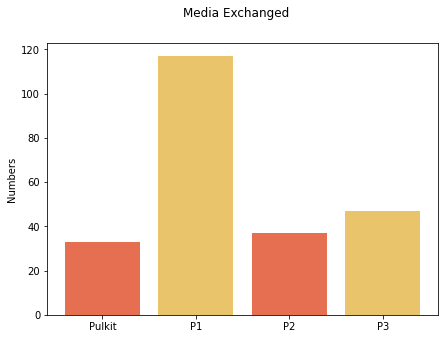

In [24]:

fig = plt.figure(figsize=(7, 5))
plt.ylabel("Numbers")
fig.suptitle('Media Exchanged')
plt.bar(range(len(lname)), list(lname.values()), align='center',color=["#e76f51", '#e9c46a'])
plt.xticks(range(len(lname)), list(lname.keys()))
plt.show()


In [25]:
textdata[:10]

['3/16/19 9:54 AM - Pulkit: Dekhokya mila',
 '3/16/19 9:55 AM - P1: Haha',
 '3/16/19 9:55 AM - P2: Oee',
 '3/16/19 9:55 AM - P1: Xams over',
 '3/16/19 9:55 AM - Pulkit: Yesss kal',
 '3/16/19 9:55 AM - P1: Party',
 '3/16/19 9:57 AM - P1: Guys come on LinkedIn',
 '3/16/19 9:59 AM - P2: Alrdy there',
 '3/16/19 9:59 AM - Pulkit: 1',
 '3/16/19 10:04 AM - P1: Accept connection']

URL finding

In [26]:
url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"

In [27]:
lurl = []
murldata =[] 
for line in textdata:
    url = re.findall(url_regex,line)
    if url:
        try:
            temp = line.split(" - ")[1].strip()
            name = temp.split(":")[0].strip()
            lurl.append([name,url[0][0]])
        except:
            pass
    else:
        murldata.append(line)
textdata = murldata

In [28]:
textdata

arewell me mass bunk hojana h fr to',
 '3/25/20 8:18 PM - Pulkit: Tumhari online class hoti h',
 '3/25/20 8:18 PM - Pulkit: Lol',
 '3/25/20 8:19 PM - P2: Almost tchrs reading material bhjti h and usse related ek short assignment  comments me present maam likho class ke time pe aur vo submit kro ussi din',
 '3/25/20 8:22 PM - P1: Helloo',
 '3/25/20 8:23 PM - P2: Welcome back',
 '3/25/20 8:26 PM - P1: Yes dear',
 '3/25/20 8:26 PM - P1: So night game plan',
 '3/25/20 8:29 PM - P1: Comeon men',
 '3/25/20 8:29 PM - Pulkit: I dont mind',
 '3/25/20 8:29 PM - P2: Done',
 '3/25/20 8:29 PM - P1: 930 milte hai the',
 '3/25/20 8:29 PM - Pulkit: Pehle wo bta number jo maange tune',
 '3/25/20 8:29 PM - P1: Dinner karlo pelenge fir',
 '3/25/20 8:30 PM - P1: UPLOAD THE SAME GIF AND FOLLOW THE GAME 1propose me In ur style 2u say me love u 3Take a selfi and send me 4Give me a special treat 5What Im to u 6what kind of relationship u wish to be with me 7Do you love me  8Buy me a dress 9One word for me 10Y

In [29]:
lurl

[['P1',
  'https://internshalacom/internwithiconutmsourcewithouteapwputmmediumiwi752336'],
 ['P1',
  'https://wwwdineoutcoin/blog/2019/05/16/wedding-themed-restaurant-must-dine/'],
 ['P1',
  'https://milaaporg/fundraisers/booksforallutmsourcewhatsapputmmediumfundraisers-title'],
 ['P1', 'https://youtube/nsPRgiIFt4k'],
 ['P1', 'https://wwwfacebookcom/wingsoffiresrcc'],
 ['P2', 'https://playgooglecom/store/apps/detailsidcomwbgoogtruthcomesout'],
 ['P2', 'https://thetruthcomesoutpagelink/juYSnnBZdUZK6ngV7'],
 ['P3', 'https://thetruthcomesoutpagelink/35xRmn2XUFFwoUBX7'],
 ['P2', 'https://thetruthcomesoutpagelink/juYSnnBZdUZK6ngV7'],
 ['P2', 'https://playgooglecom/store/apps/detailsidcomsupergamingpartyplay'],
 ['P3', 'https://appsapplecom/in/app/evil-apples-vs-humanity/id645705454'],
 ['Pulkit', 'https://skribblio/4X9frZ8aWRem'],
 ['P3', 'http://playevilapplescom/CMsxP'],
 ['P3', 'http://playevilapplescom/RNCTA'],
 ['Pulkit', 'https://skribblio/py9aTTR7xmFD'],
 ['P1', 'https://youtube/qysU

In [30]:
textdata[:10]

['3/16/19 9:54 AM - Pulkit: Dekhokya mila',
 '3/16/19 9:55 AM - P1: Haha',
 '3/16/19 9:55 AM - P2: Oee',
 '3/16/19 9:55 AM - P1: Xams over',
 '3/16/19 9:55 AM - Pulkit: Yesss kal',
 '3/16/19 9:55 AM - P1: Party',
 '3/16/19 9:57 AM - P1: Guys come on LinkedIn',
 '3/16/19 9:59 AM - P2: Alrdy there',
 '3/16/19 9:59 AM - Pulkit: 1',
 '3/16/19 10:04 AM - P1: Accept connection']

Unique Speakers

In [31]:
for line in textdata:
    #print(line)
    temp = line.split(" - ")
  #  name = temp.split(":")[0]
    print(temp)

4/4/20 3:17 PM', 'P2: Ni humare sth dhoka hua tha']
['4/4/20 3:17 PM', 'Pulkit: Haan wo toh kabse ho hi rha h tumpe']
['4/4/20 3:17 PM', 'P2: Bcz ye hua tha iske baad']
['4/4/20 3:18 PM', 'P2: What do you mean']
['4/4/20 3:18 PM', 'Pulkit: Mujhe kahani jaan ni h poori']
['4/4/20 3:18 PM', 'Pulkit:']
['4/4/20 3:18 PM', 'Pulkit: Abhi bhi toh yehi krte h mai aur prakhar']
['4/4/20 3:19 PM', 'P2:  ab to tumare pas gals h yr']
['4/4/20 3:19 PM', 'P2: Muje b ni smj ai bs ye smj aya ki hume dhoka mila h']
['4/4/20 3:21 PM', 'P3: I think ye meal planning wale groups h']
['4/4/20 3:22 PM', 'Pulkit: Par wo toh hum 6 log ne saath mei kri thi I remember']
['4/4/20 3:22 PM', 'Pulkit: Hum chaar  ashish kartik']
['4/4/20 3:22 PM', 'P3: Han macaroni wale gol gappe']
['4/4/20 3:22 PM', 'P2: Ni kisi presentation ki baat hori h']
['4/4/20 3:22 PM', 'Pulkit: I guess']
['4/4/20 3:22 PM', 'Pulkit: Lol Mza aaya tha kaafi']
['4/4/20 3:23 PM', 'P2: Kiska glass tuta tha']
['4/4/20 3:23 PM', 'P3: Kartik']
['4/4/

In [32]:
uname = []
for line in textdata:
    temp = line.split(" - ")[1].strip()
    name = temp.split(":")[0].strip()
    uname.append(name)
uname = set(uname)

In [33]:
uname

{'P1',
 'P1 changed the group description',
 'P2',
 'P3',
 'Pulkit',
 'You changed the subject from Gumnaam to CA ka group Gumnaam'}

In [58]:
fname = []
for name in uname:
    if not re.findall("changed|encryption|removed|no longer an admin|added|left|now an admin |blocked| unblocked",name):
        fname.append(name)

In [59]:
fname

['P3', 'P1', 'Pulkit', 'P2']

Making corpous of each person

List all texts

In [36]:
corpous = {}
for line in textdata:
    tempo = line.split(" - ")[1].strip()
    name = tempo.split(":")[0].strip()
    
    if name in fname:
        try:
            temp = corpous[name]
            t = line.split(" - ")[1].strip()
            temp = temp + " "+t.split(":")[1].strip()
            corpous[name] = temp
        except:
            t = line.split(" - ")[1].strip()
            temp = t.split(":")[1].strip()
            
            corpous[name] = temp
textcorpous = corpous

List all months

In [37]:
corpous = {}
for line in textdata:
    temp = line.split(" - ")[1].strip()
    name = temp.split(":")[0].strip()
    if name in fname:
        try:
            temp = corpous[name]
            temp = temp + " "+line.split(" ")[0].split("/")[0].strip()
            corpous[name] = temp
        except:
            temp =  line.split(" ")[0].strip().split("/")[0].strip()
            corpous[name] = temp
date = corpous
for key in date.keys():
    dstr = date[key]
    date[key] = dstr.split(" ")

List all time

In [38]:
corpous = {}
for line in textdata:
    temp = line.split(" - ")[1].strip()
    name = temp.split(":")[0].strip()
    if name in fname:
        try:
            temp = corpous[name]
            temp = temp + ","+line.split(" ")[1] +" "+line.split(" ")[2].split(" - ")[0]
            corpous[name] = temp
        except:
            temp =  line.split(" ")[1] +" "+line.split(" ")[2].split(" - ")[0]
            corpous[name] = temp
time = corpous
for key in date.keys():
    dstr = time[key]
    time[key] = dstr.split(",")

NLTK

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/pulkit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenization, Lemmatization, Case Removal, StopWord Removal and Number Extration

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

In [41]:
lemmatizer = WordNetLemmatizer()
numberdb ={}
for key in textcorpous.keys():
    data = textcorpous[key]
    tokens = word_tokenize(data)
    numbers = [word.lower() for word in tokens if not word == "" and not word.isalpha() and len(word)>3]
    tokens = [word.lower() for word in tokens if not word == "" and word.isalpha()]
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    ftokens = [word for word in lemmas if not word in stopwords.words('english')]
    textcorpous[key] = ftokens
    if numbers:
        numberdb[key] = numbers

Plot Dates

In [42]:
date_list = []
for name in date.keys():
    date_list.extend(date[name])

date_list.sort(key=int)

date_fdict = defaultdict( int )
for x in date_list:
    date_fdict[x] += 1

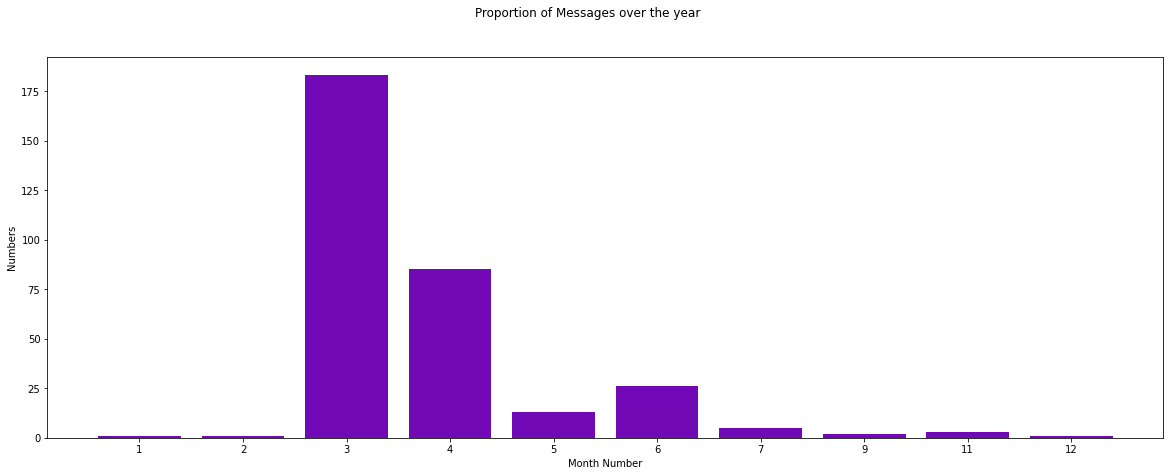

In [43]:
fig = plt.figure(figsize=(20, 7))
fig.suptitle('Proportion of Messages over the year')
plt.xlabel("Month Number")
plt.ylabel("Numbers")
plt.bar(range(len(date_fdict)), list(date_fdict.values()), align='center', color= "#7209B7")
plt.xticks(range(len(date_fdict)), list(date_fdict.keys()))
plt.show()


Plot Time

In [44]:
from datetime import datetime

In [45]:
time_list = []
for name in time.keys():
    time_list.extend(time[name])
print(time_list)

['9:54 AM', '9:55 AM', '9:59 AM', '8:50 AM', '11:12 PM', '11:12 PM', '11:13 PM', '11:13 PM', '11:14 PM', '11:15 PM', '11:16 PM', '11:16 PM', '11:16 PM', '11:17 PM', '11:17 PM', '11:23 PM', '11:33 AM', '12:38 PM', '12:43 PM', '9:38 PM', '9:38 PM', '9:38 PM', '12:05 AM', '10:24 AM', '11:27 AM', '11:29 AM', '12:06 PM', '4:43 PM', '2:57 PM', '10:36 PM', '12:49 PM', '7:15 PM', '7:15 PM', '7:15 PM', '7:16 PM', '7:16 PM', '7:19 PM', '7:19 PM', '7:20 PM', '7:21 PM', '7:21 PM', '7:21 PM', '7:22 PM', '7:23 PM', '8:05 PM', '8:06 PM', '8:07 PM', '8:09 PM', '8:14 PM', '8:17 PM', '8:17 PM', '8:17 PM', '8:18 PM', '8:18 PM', '8:29 PM', '8:29 PM', '8:34 PM', '8:35 PM', '8:35 PM', '8:38 PM', '9:16 PM', '9:17 PM', '9:17 PM', '9:17 PM', '9:19 PM', '9:21 PM', '9:23 PM', '9:42 PM', '9:42 PM', '9:44 PM', '9:58 PM', '9:59 PM', '10:00 PM', '10:03 PM', '10:03 PM', '10:16 PM', '10:18 PM', '11:04 PM', '11:04 PM', '11:05 PM', '11:05 PM', '11:05 PM', '11:05 PM', '11:06 PM', '11:06 PM', '11:07 PM', '11:07 PM', '11:0

In [46]:
hh_list = []
for tz in time_list:    
    ap = tz.split(":")[1].split(" ")[1]
    hh = tz.split(":")[0]
    hh_list.append(hh+" "+ap)

hh_list.sort(key = lambda date: datetime.strptime(date, '%I %p')) 
time_fdict = defaultdict( int )
for x in hh_list:
    time_fdict[x] += 1

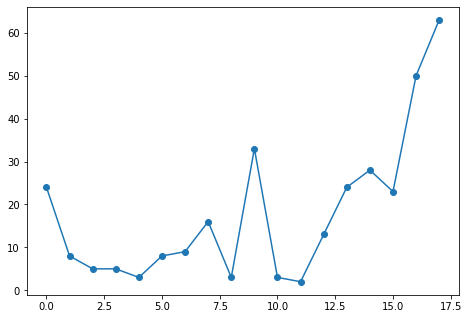

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(range(len(time_fdict)), list(time_fdict.values()))
plt.plot(range(len(time_fdict)), list(time_fdict.values()))
plt.show()


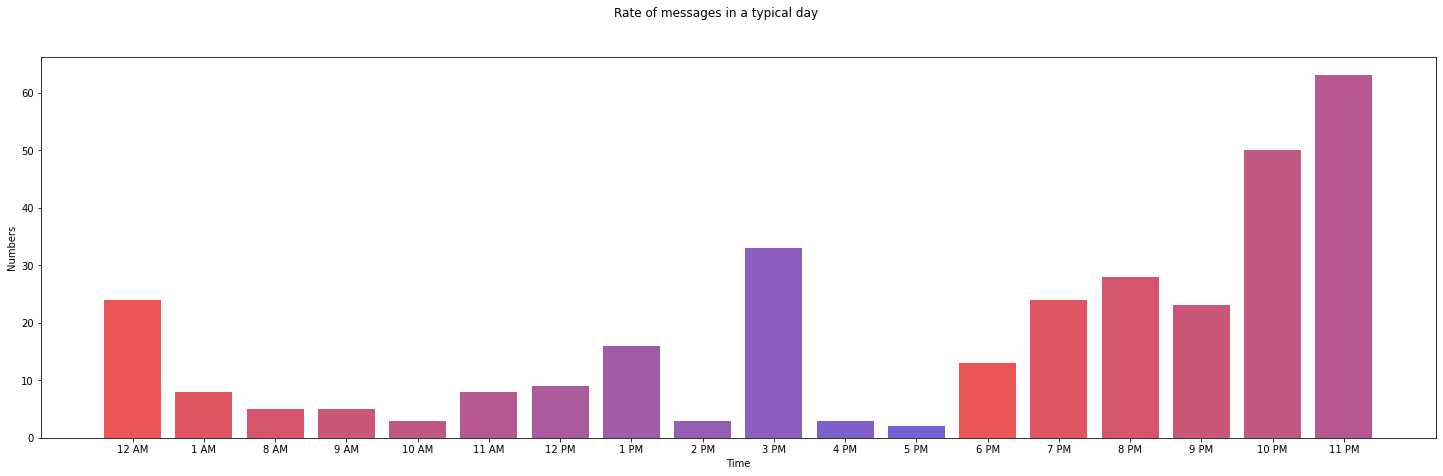

In [48]:
fig = plt.figure(figsize=(25, 7))
fig.suptitle('Rate of messages in a typical day')
plt.bar(range(len(time_fdict)), list(time_fdict.values()), align='center', color=["#EA5455", "#DF5560", "#D5566C", "#CA5778",  "#C05884", "#B55990", "#AB5B9C",  "#A15CA7",  "#965DB3",  "#8C5EBF",  "#815FCB",  "#7760D7"])
plt.xlabel("Time")
plt.ylabel("Numbers")
plt.xticks(range(len(time_fdict)), list(time_fdict.keys()))
plt.show()

Plot emojis

In [49]:
emo_list = []
for line,emojis in emodata:
    if len(emojis)>1:
        lemoji = []
        for x in emojis:
            lemoji.extend(list(x))
    else:
        lemoji = list(emojis[0])
    emo_list.extend(lemoji)


In [50]:
emo_freq_dict = defaultdict( int )
for emojis in emo_list:
    emo_freq_dict[emojis] += 1

In [51]:
import emoji 
emo_freq_dict_wrd = {}
for key in emo_freq_dict.keys():
    name = emoji.demojize(key).strip(":")
    emo_freq_dict_wrd[name] = emo_freq_dict[key]

In [52]:
emo_freq_dict_wrd = {k: v for k, v in sorted(emo_freq_dict_wrd.items(), key=lambda item: item[1])}
keys = list(emo_freq_dict_wrd.keys())
keys[-10:]

['confetti_ball',
 'balloon',
 'party_popper',
 'neutral_face',
 'wrapped_gift',
 'female_sign',
 '\u200d',
 'light_skin_tone',
 'winking_face_with_tongue',
 'face_with_tears_of_joy']

In [53]:
emo_freq_dict_final = {}
for key in keys[-10:]:
    emo_freq_dict_final[key] = emo_freq_dict_wrd[key]

In [54]:
femoji = []
for key in keys[-10:]:
    emo = emoji.emojize(":"+key+":")
    femoji.append(emo)
femoji[::-1]

['😂', '😜', '🏻', ':\u200d:', '♀', '🎁', '😐', '🎉', '🎈', '🎊']

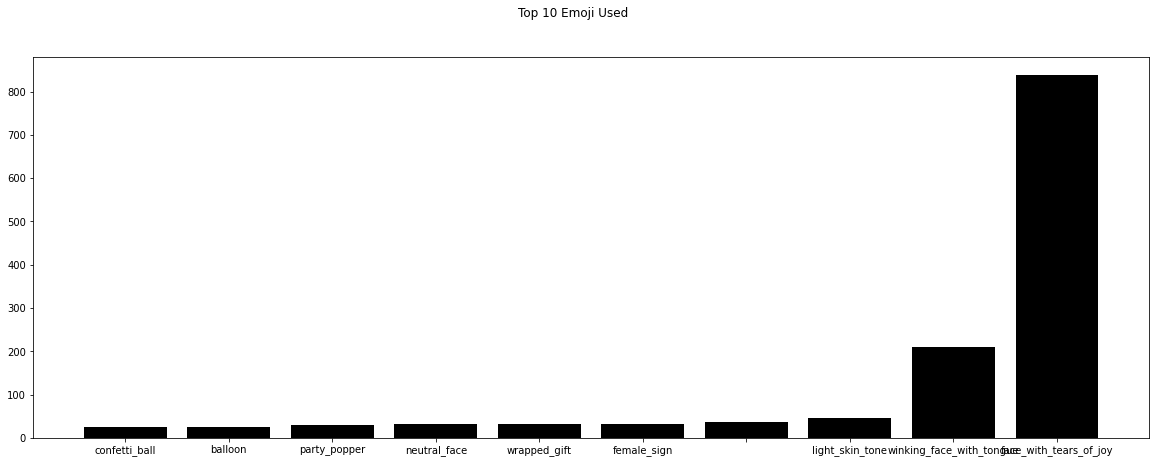

In [55]:
fig = plt.figure(figsize=(20, 7))    #pie better
fig.suptitle('Top 10 Emoji Used')
plt.bar(range(len(emo_freq_dict_final)), list(emo_freq_dict_final.values()), color='black')
plt.xticks(range(len(emo_freq_dict_final)), list(emo_freq_dict_final.keys()))
plt.show()

Word Cloud for each person

In [56]:
from wordcloud import WordCloud

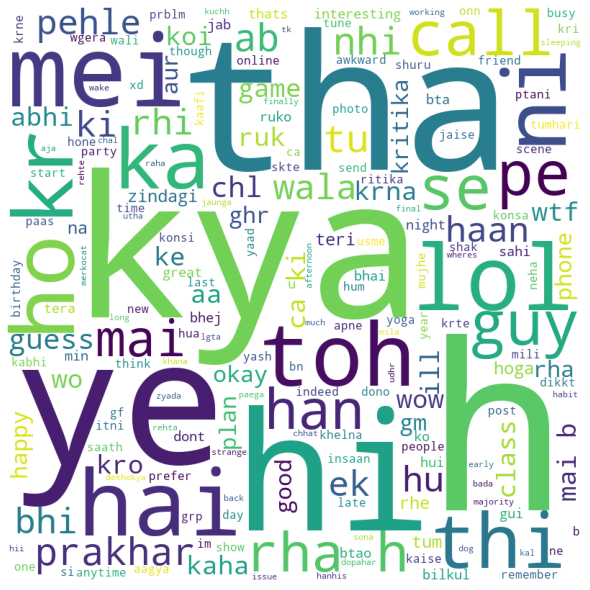

In [57]:
for key in textcorpous.keys():
    data = textcorpous[key]
    cloud_vec =  " ".join(x for x in data)   
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white', min_font_size = 10).generate(cloud_vec) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    plt.show()

In [ ]:
# word count vs emoji count 
# media

# distribution plot. length of words in a sentence.  plt.dist()

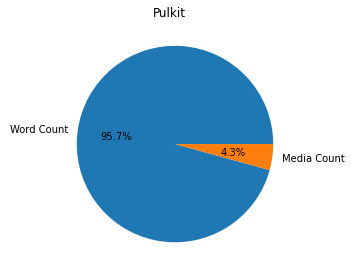

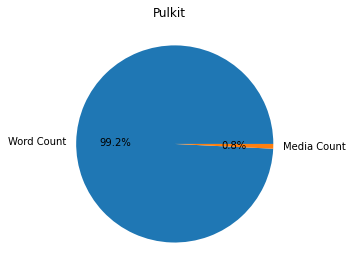

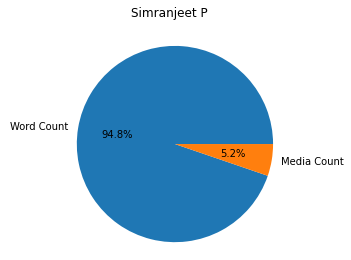

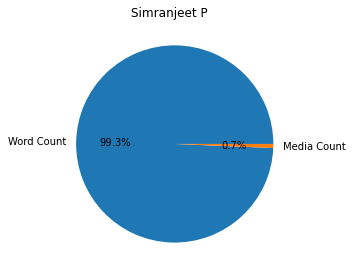

In [171]:
labels = ['Word Count', 'Media Count']

for key in textcorpous.keys():
    
    data = textcorpous[key]
    img = lname[key]
    sizes = [len(data), img]
    count = [len(data),len(keys)]


    fig, ax = plt.subplots()
    ax.pie(sizes, labels= labels, autopct="%1.1f%%")
    ax.axis('equal')
    fig.suptitle(key)

    

    fig1, ax1 = plt.subplots()
    ax1.pie(count, labels= labels, autopct="%1.1f%%")
    ax1.axis('equal')
    fig1.suptitle(key)

    plt.show()


